# Questão 1

Crie um array x com 200 pontos, começando de -10 até 10. Depois calcule as seguintes funções sobre esse array:

```
y1 = sen(x) / x
y2 = 1 / (1-e^(-x))
```

Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).

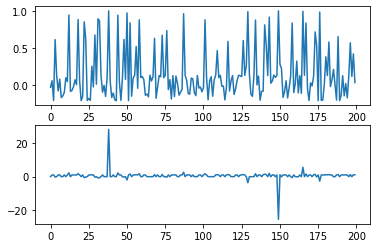

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f1(x):
    return math.sin(x) / x

def f2(x):
    return 1 / (1 - math.e ** (-x))

numbers = np.random.uniform(size = 200, low = -10, high = 10)

result_y1 = np.array([f1(x) for x in numbers])

result_y2 = np.array([f2(x) for x in numbers])

fig, axs = plt.subplots(2)

axs[0].plot(result_y1)

axs[1].plot(result_y2)

# Questão 2

Carregue o arquivo avocado.csv e, em seguida, siga as instruções abaixo:

(a) Obtenha apenas os dados desse dataset que são referentes à região da Califórnia (California), no ano de 2017; e salva-os em um novo dataframe.

(b) A partir do dataframe obtido no item (a), obtenha apenas os dados referentes à abacates do tipo convencional; em seguida, salve em um novo dataframe.

(c) Utilizando o dataframe salvo no item (b), crie um gráfico de linha que apresente a variação do preço médio do abacate ao longo do ano de 2017 (datas) na região da Califórnia.

(d) Utilizando o dataframe salvo no item (a), crie um gráfico de pizza que apresente o percentual do volume total de abacates vendidos para cada tipo: convencional e orgânico.

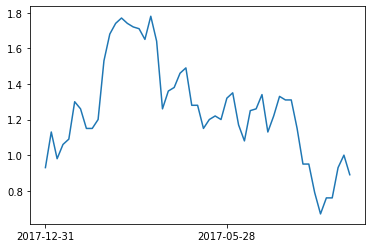

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('../data/avocado.csv')

# (a)

avocados_from_california = df.loc[df['region'] == 'California']

# (b)

avocados_from_california_conventional = avocados_from_california.loc[df['type'] == 'conventional']

# (c)

data = avocados_from_california_conventional.loc[
    (avocados_from_california_conventional['year'] == 2017)
]

fig, ax = plt.subplots()

ax.plot('Date', 'AveragePrice', data=data)

ax.xaxis.set_major_locator(mdates.MonthLocator())


# Questão 3

Carregue o dataset contido no arquivo cholera-dataset.csv em um objeto DataFrame. Esse dataset contém dados referentes ao número de casos reportados de cólera em cada país, desde 1950 até 2016, além do número de mortes provocadas pela cólera; dentre outras informações.

Após carregar esse dataset, obtenha:

(a) Apenas os dados da Índia.

(b) Crie um gráfico de barras que apresente o número de casos reportados e de mortes causadas pela cólera na Índia, ambos em um mesmo axes, em função do ano.

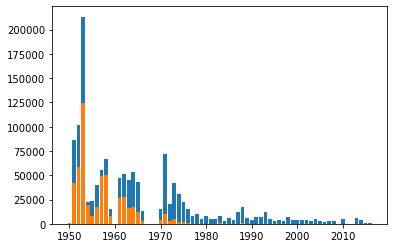

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/cholera-dataset.csv')

# (a)

data_from_india = df.loc[df['Country'] == 'India']

# (b)

fig, ax = plt.subplots()

ax.bar(data_from_india['Year'], data_from_india['Number of reported cases of cholera'])

ax.bar(data_from_india['Year'], data_from_india['Number of reported deaths from cholera'])

plt.show()

# Questão 4

Carregue os dados do arquivo googleplaystore.csv e, em seguida:

(a) Crie um gráfico de pizza que apresente o percentual dos gêneros (Genres) dos aplicativos. Como existem muitos gêneros, considere apenas os 10 primeiros.

(b) Crie um gráfico de barras que contenha a quantidade de aplicativos que foram desenvolvidos para cada versão específica (ou conjunto de versões) do Android, especificadas na coluna Android Ver.

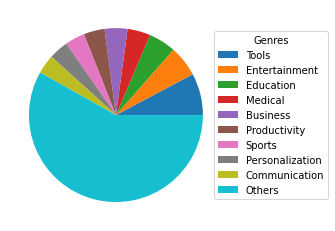

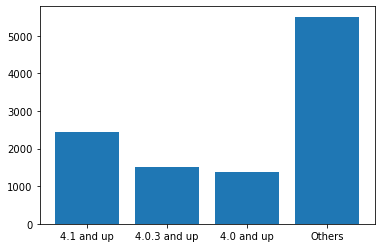

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/googleplaystore.csv')

# (a)

games_by_genres = df.groupby(['Genres']).size()

games_by_genres = games_by_genres.apply(lambda x: x / len(df) * 100)

games_by_genres.sort_values(ascending=False, inplace=True)

games_by_genres = games_by_genres[:9]

games_by_genres['Others'] = 100 - games_by_genres.sum()

fig, ax = plt.subplots()

ax.pie(games_by_genres)

plt.legend(title = 'Genres', labels = games_by_genres.index, loc='right', bbox_to_anchor=(1.5, 0.5))

plt.show()

# (b)

number_of_versions = df['Android Ver'].value_counts()

total = number_of_versions.sum()

number_of_versions = number_of_versions.sort_values(ascending = False)

# Exibe apenas as 3 versoes com mais aplicativos e o resto fica na coluna 'Others'

number_of_versions = number_of_versions[:3]

number_of_versions['Others'] = total - number_of_versions.sum()

fig, ax = plt.subplots()

ax.bar(number_of_versions.index, number_of_versions)

plt.show()

# Questão 5

Carregue o arquivo houses_to_rent.csv. Em seguida:

(a) Crie um gráfico de dispersão para visualizar uma relação entre a área e o preço total do aluguel do imóvel.

(b) Visualize os outliers presentes na coluna da área utilizando o boxplot.

(c) Faça o mesmo que foi solicitado no item anterior, porém, para a coluna do preço total do aluguel.

(d) Elimine os outliers de ambas as colunas utilizando o método quantile.

(e) Crie novamente um gráfico de dispersão dos dados da área e preço total do aluguel do imóvel; dessa vez, após a remoção dos outliers de ambas as colunas.

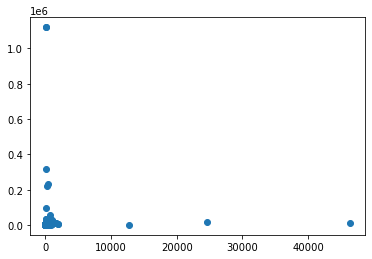

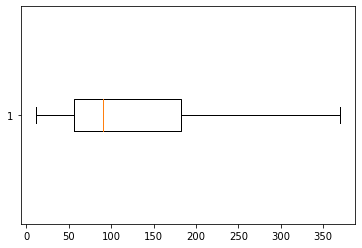

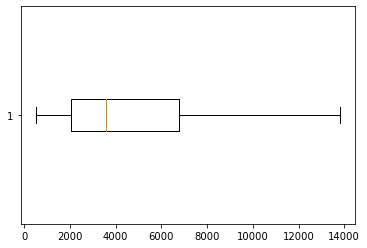

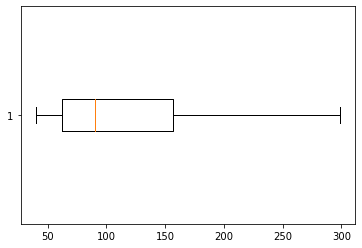

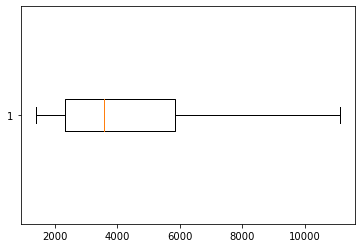

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats

df = pd.read_csv('../data/houses_to_rent.csv')

# (a)

plt.scatter(df['area'], df['total (R$)'])

plt.show()

# (b)

fig1, ax1 = plt.subplots()

ax1.boxplot(df['area'], showfliers=False, vert=False)

plt.show()

# (c)

fig1, ax1 = plt.subplots()

ax1.boxplot(df['total (R$)'], showfliers=False, vert=False)

plt.show()

# (d) e (e)

pd_series_adjusted = df['area'][df['area'].between(df['area'].quantile(.1), df['area'].quantile(.9))] 

fig1, ax1 = plt.subplots()

ax1.boxplot(pd_series_adjusted, showfliers=False, vert=False)

plt.show()

pd_series_adjusted = df['total (R$)'][df['total (R$)'].between(df['total (R$)'].quantile(.1), df['total (R$)'].quantile(.9))] 

fig1, ax1 = plt.subplots()

ax1.boxplot(pd_series_adjusted, showfliers=False, vert=False)

plt.show()